In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando e preparando os dados

Dataset: Soccer Stats LaLiga - From 2014/2015 to 2018/2019 
##### Link: https://www.kaggle.com/datasets/navarrojavier/la-liga-stats
##### Download em: 29-11-2022

In [2]:
df_stats_code = pd.read_csv('data-laliga/tbl_stats_code.csv')
df_stats_code

,id_stat,stat
0,1,Corners
1,4,Fouls
2,5,Offsides
3,6,Posession
4,2,Shots on target
5,3,Shots wide


In [3]:
df_stats = pd.read_csv('data-laliga/tbl_stats.csv')
df_stats

,id_stat,id_match,id_team,id_stat_code,occurrences/percentage
0,"10,527",762,14,1,5
1,"10,528",762,14,2,1
2,"10,529",762,14,3,3
3,"10,530",762,14,4,14
4,"10,531",762,14,5,2
...,...,...,...,...,...
22699,"33,226","3,801",14,2,3
22700,"33,227","3,801",14,3,6
22701,"33,228","3,801",14,4,11
22702,"33,229","3,801",14,5,1


##### Fazendo um join com dataframes

In [4]:
left_df = df_stats\
    .set_index('id_stat_code') # o id da tabela passa a ser a coluna id_stat_code

right_df = df_stats_code\
    .rename(columns={'id_stat': 'id_stat_code'})\
    .set_index('id_stat_code')

df_stats_join = left_df\
    .join(right_df, how='left')

df_stats_join

,id_stat,id_match,id_team,occurrences/percentage,stat
id_stat_code,,,,,
1,"10,527",762,14,5,Corners
1,"10,533",762,17,5,Corners
1,"10,539",763,133,5,Corners
1,"10,545",763,11,0,Corners
1,"10,551",764,132,5,Corners
...,...,...,...,...,...
6,"33,206","3,799",4,49,Posession
6,"33,212","3,800",8,51,Posession
6,"33,218","3,800",5,49,Posession


In [5]:
# loc = localizar
possession = df_stats_join.loc[6]['occurrences/percentage']
possession

id_stat_code
6    53
6    47
6    67
6    33
6    40
     ..
6    49
6    51
6    49
6    53
6    47
Name: occurrences/percentage, Length: 3784, dtype: int64

## 2 histograma

<AxesSubplot: >

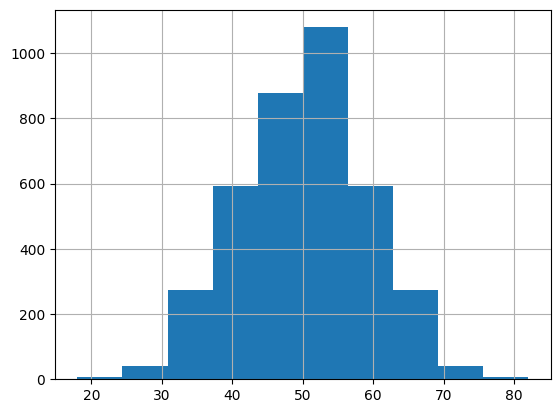

In [6]:
# Básico com o Pandas 
# Frequencia de ocorrencias

possession.hist()

<AxesSubplot: >

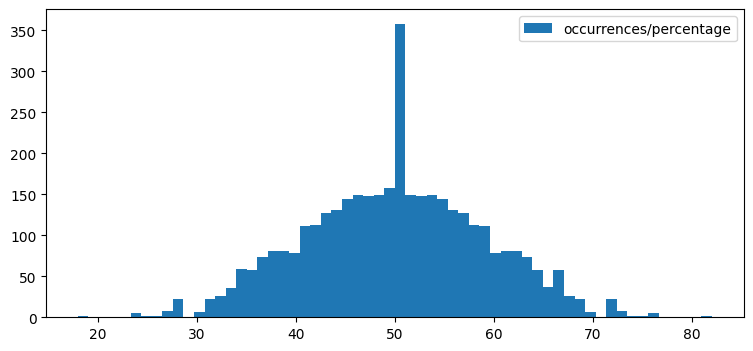

In [16]:
possession.hist(figsize=(9,4), grid=False, bins=60, legend=True)

(array([  1.,   0.,   0.,   0.,   0.,   5.,   2.,   2.,   8.,  22.,   0.,
          7.,  22.,  26.,  36.,  59.,  58.,  73.,  81.,  81.,  79., 111.,
        113., 127., 131., 144., 149., 148., 149., 158., 358., 149., 148.,
        149., 144., 131., 127., 113., 111.,  79.,  81.,  81.,  73.,  58.,
         37.,  58.,  26.,  22.,   7.,   0.,  22.,   8.,   2.,   2.,   5.,
          0.,   0.,   0.,   0.,   1.]),
 array([18.        , 19.06666667, 20.13333333, 21.2       , 22.26666667,
        23.33333333, 24.4       , 25.46666667, 26.53333333, 27.6       ,
        28.66666667, 29.73333333, 30.8       , 31.86666667, 32.93333333,
        34.        , 35.06666667, 36.13333333, 37.2       , 38.26666667,
        39.33333333, 40.4       , 41.46666667, 42.53333333, 43.6       ,
        44.66666667, 45.73333333, 46.8       , 47.86666667, 48.93333333,
        50.        , 51.06666667, 52.13333333, 53.2       , 54.26666667,
        55.33333333, 56.4       , 57.46666667, 58.53333333, 59.6       ,
      

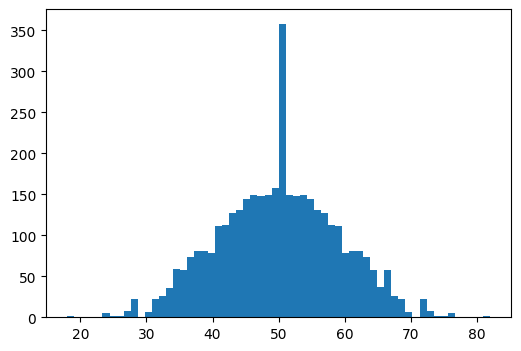

In [20]:
# Com Matplotlib
fig, ax = plt.subplots(*(1, 1), figsize=(6, 4))

ax.hist(x=possession, bins=60)
#ax.hist(x=possession, bins=60, histtype='step')

(array([0.00024775, 0.        , 0.        , 0.        , 0.        ,
        0.00123877, 0.00049551, 0.00049551, 0.00198203, 0.00545058,
        0.        , 0.00173428, 0.00545058, 0.0064416 , 0.00891913,
        0.01461747, 0.01436971, 0.01808602, 0.02006805, 0.02006805,
        0.01957254, 0.02750066, 0.02799617, 0.03146472, 0.03245573,
        0.03567653, 0.0369153 , 0.03666755, 0.0369153 , 0.03914508,
        0.08869582, 0.0369153 , 0.03666755, 0.0369153 , 0.03567653,
        0.03245573, 0.03146472, 0.02799617, 0.02750066, 0.01957254,
        0.02006805, 0.02006805, 0.01808602, 0.01436971, 0.00916689,
        0.01436971, 0.0064416 , 0.00545058, 0.00173428, 0.        ,
        0.00545058, 0.00198203, 0.00049551, 0.00049551, 0.00123877,
        0.        , 0.        , 0.        , 0.        , 0.00024775]),
 array([18.        , 19.06666667, 20.13333333, 21.2       , 22.26666667,
        23.33333333, 24.4       , 25.46666667, 26.53333333, 27.6       ,
        28.66666667, 29.73333333, 30

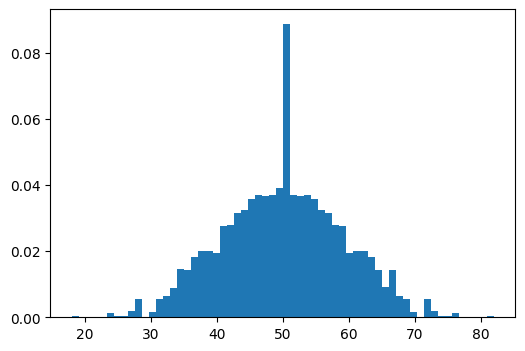

In [21]:
fig, ax = plt.subplots(*(1, 1), figsize=(6, 4))

ax.hist(x=possession, bins=60, density=True)

## 3 Momentos

In [9]:
possession.agg(['mean', 'median', 'var', 'std', 'skew', 'kurtosis'])

mean        50.000000
median      50.000000
var         81.160455
std          9.008910
skew         0.000000
kurtosis    -0.189924
Name: occurrences/percentage, dtype: float64

In [10]:
possession.describe()

count    3784.00000
mean       50.00000
std         9.00891
min        18.00000
25%        44.00000
50%        50.00000
75%        56.00000
max        82.00000
Name: occurrences/percentage, dtype: float64

In [11]:
# removendo a média e calculando o desvio padrão
possession_media_zero = (possession - possession.mean())
desvio_padrao = possession.std()


In [12]:
# cálculo de assimetria
assimetria = (possession_media_zero**3).mean() / (desvio_padrao**3)
assimetria

0.0

In [13]:
# cálculo de curtose, definição formal
curtose = (possession_media_zero**4).mean() / (desvio_padrao**4)
curtose

2.807257612618744

In [14]:
# curtose de excesso

curtose_de_excesso = curtose - 3
curtose_de_excesso

-0.19274238738125593